In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt("./data/old_faithful.txt")
data.shape

(272, 2)

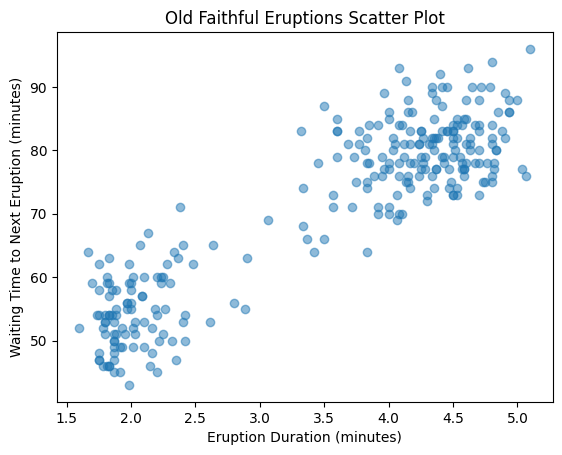

In [5]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time to Next Eruption (minutes)")
plt.title("Old Faithful Eruptions Scatter Plot")
plt.show()

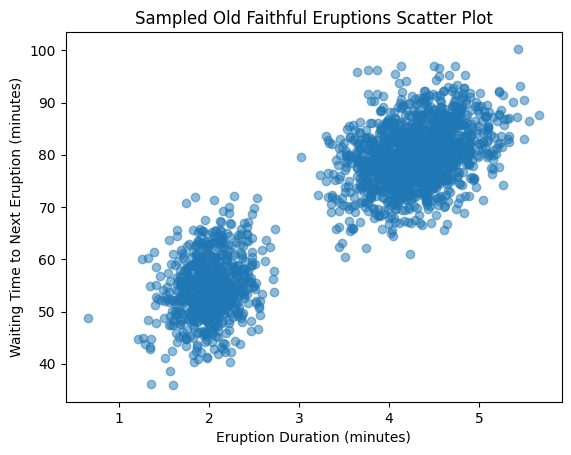

In [8]:
mus = np.array([[2, 54.5], [4.3, 80]])
covs = np.array([[[0.07, 0.44], [0.44, 33.7]], [[0.17, 0.94], [0.94, 36]]])
phis = np.array([0.35, 0.65])


def sample():
    z = np.random.choice(2, p=phis)
    mu, cov = mus[z], covs[z]
    x = np.random.multivariate_normal(mu, cov)
    return x


N = 2000
xs = np.zeros((N, 2))
for i in range(N):
    xs[i] = sample()

plt.scatter(xs[:, 0], xs[:, 1], alpha=0.5)
plt.xlabel("Eruption Duration (minutes)")
plt.ylabel("Waiting Time to Next Eruption (minutes)")
plt.title("Sampled Old Faithful Eruptions Scatter Plot")
plt.show()

In [9]:
def multi_normal(x: np.ndarray, mu: np.ndarray, sigma: np.ndarray):
    exponent = -0.5 * (x - mu).T @ np.linalg.inv(sigma) @ (x - mu)
    denominator = np.sqrt((2 * np.pi) ** len(mu) * np.linalg.det(sigma))

    return np.exp(exponent) / denominator

In [10]:
def gmm(x: np.ndarray, phis: np.ndarray, mus: np.ndarray, covs: np.ndarray):
    K = len(phis)
    y = 0

    for k in range(K):
        phi, mu, cov = phis[k], mus[k], covs[k]
        y += phi * multi_normal(x, mu, cov)

    return y

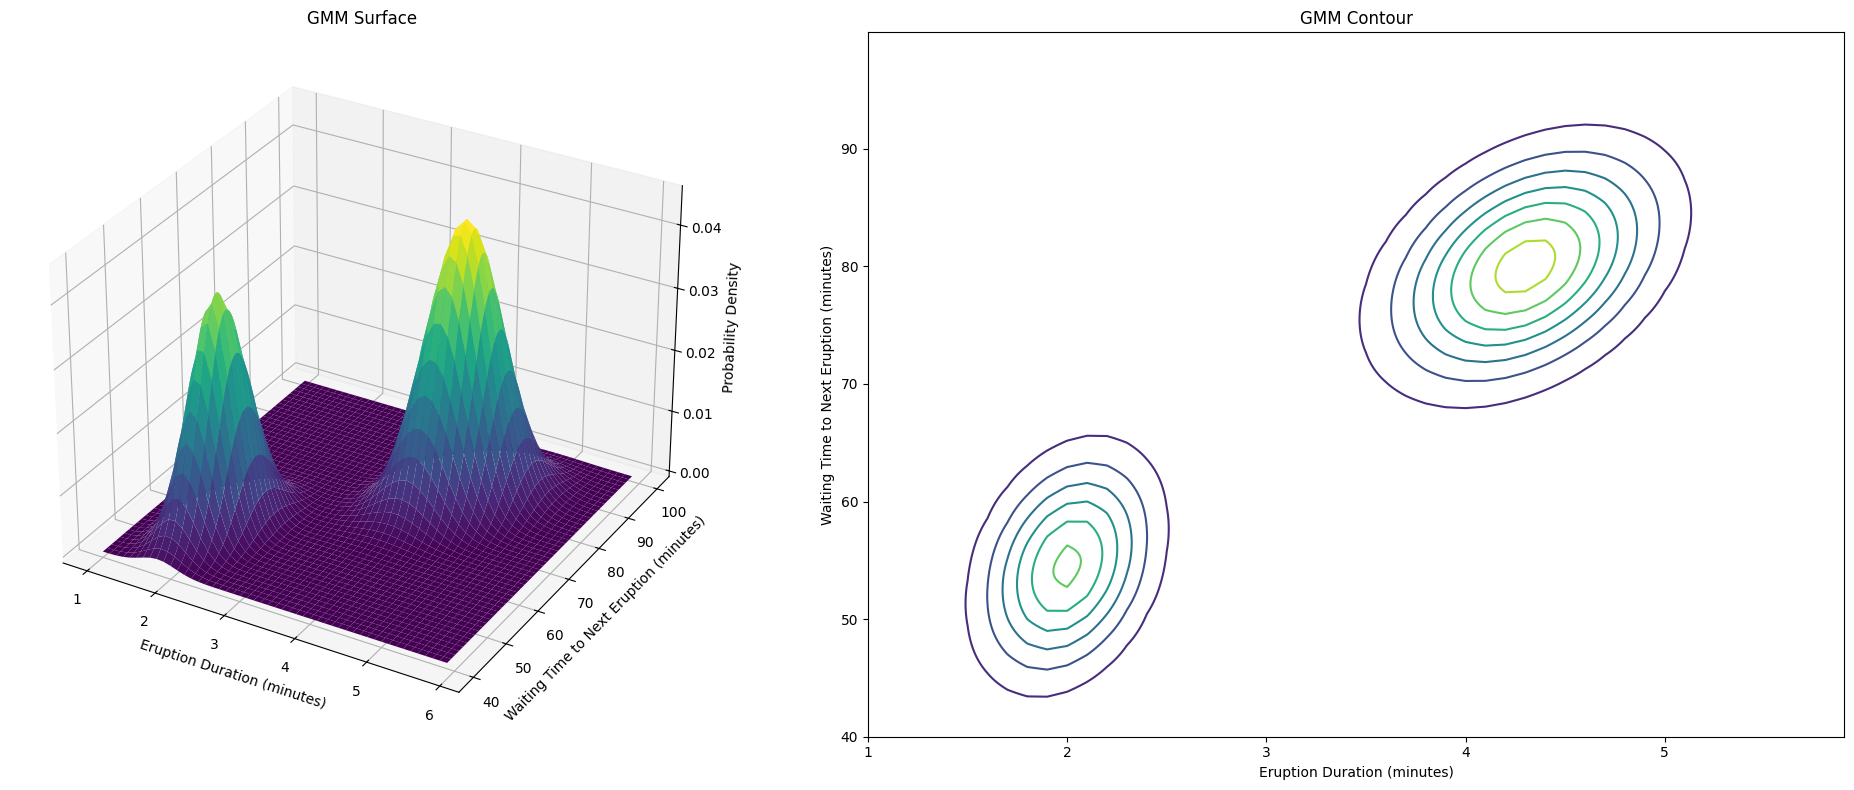

In [14]:
xs = np.arange(1, 6, 0.1)
ys = np.arange(40, 100, 0.1)
x, y = np.meshgrid(xs, ys)
z = np.zeros_like(x)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        z[i, j] = gmm(np.array([x[i, j], y[i, j]]), phis, mus, covs)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis", edgecolor="none")
ax.set_title("GMM Surface")
ax.set_xlabel("Eruption Duration (minutes)")
ax.set_ylabel("Waiting Time to Next Eruption (minutes)")
ax.set_zlabel("Probability Density")
ax2 = fig.add_subplot(122)
ax2.contour(x, y, z, cmap="viridis")
ax2.set_title("GMM Contour")
ax2.set_xlabel("Eruption Duration (minutes)")
ax2.set_ylabel("Waiting Time to Next Eruption (minutes)")
plt.tight_layout()
plt.show()

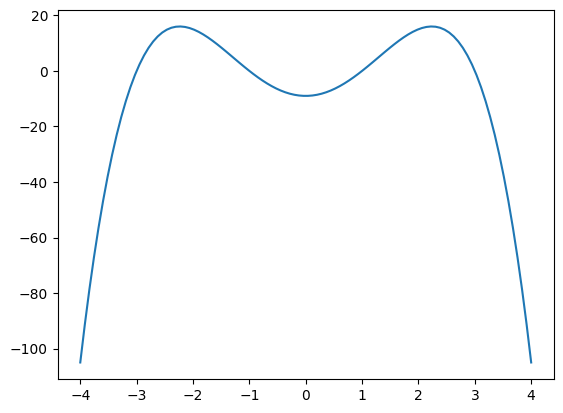

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 비볼록 함수 예시
x = np.linspace(-4, 4, 100)
y = -(x**4 - 10 * x**2 + 9)  # 여러 지역 최적점

plt.plot(x, y)